In [68]:
import numpy as np
import torch 
import random
import matplotlib.pyplot as plt

In [69]:
# initialize (Xi,Yi) 
N=200 #sample size
p=4 #dim of x
tol=0.01
x=torch.randn(p,N)
y=torch.tensor(torch.randn(N)>=0).float()  #y_i is 0 or 1
beta=torch.randn(p,1)

In [70]:
def lossfunction(x,y,beta,p):
    loss=0
    for i in range(N):
        logistic=-y[i]*torch.matmul(x[:,i],beta)+torch.log(1+torch.exp(torch.matmul(x[:,i],beta)))
        loss=loss+logistic
        
    return loss

In [71]:
def gradofloss(x,y,beta,p):
    sum=torch.zeros(p,1)
    for i in range(N):
        ptem=torch.exp(torch.matmul(x[:,i],beta))/(1+torch.exp(torch.matmul(x[:,i],beta)))
        # print(ptem.size())
        sum=sum+((y[i]-ptem)*x[:,i]).reshape(p,1)
    # print(sum.size())
    return sum

In [72]:
grad=gradofloss(x,y,beta,p)
lr=0.01
alpha=0.5
beta_lr=0.7

In [73]:
plotloss=[]
plotgrad=[]
#record loss and grad

In [74]:
while (torch.norm(grad)>=tol):
    loss_ori=lossfunction(x,y,beta,p)
    grad_ori=gradofloss(x,y,beta,p)
    plotloss.append(loss_ori)
    plotgrad.append(grad_ori)
    print("loss  "+str(loss_ori)+"  grad norm  "+str(torch.norm(grad_ori)))


    beta=beta+lr*gradofloss(x,y,beta,p)# GD

    lossnew=lossfunction(x,y,beta,p)
    loss_compare=loss_ori-alpha*lr*torch.norm(grad_ori)**2
    if (lossnew>loss_compare):
        lr=lr*beta_lr
    
    
    grad=gradofloss(x,y,beta,p)  #calculate current grad
    
    
    

loss  tensor([208.7978])  grad norm  tensor(59.2579)
loss  tensor([176.3550])  grad norm  tensor(49.5112)
loss  tensor([154.7552])  grad norm  tensor(36.9407)
loss  tensor([143.4232])  grad norm  tensor(23.8588)
loss  tensor([138.9324])  grad norm  tensor(13.5979)
loss  tensor([137.5110])  grad norm  tensor(7.2925)
loss  tensor([137.1041])  grad norm  tensor(3.8835)
loss  tensor([136.9881])  grad norm  tensor(2.1070)
loss  tensor([136.9537])  grad norm  tensor(1.1748)
loss  tensor([136.9429])  grad norm  tensor(0.6732)
loss  tensor([136.9392])  grad norm  tensor(0.3949)
loss  tensor([136.9380])  grad norm  tensor(0.2357)
loss  tensor([136.9375])  grad norm  tensor(0.1425)
loss  tensor([136.9374])  grad norm  tensor(0.0869)
loss  tensor([136.9373])  grad norm  tensor(0.0533)
loss  tensor([136.9373])  grad norm  tensor(0.0328)
loss  tensor([136.9373])  grad norm  tensor(0.0240)
loss  tensor([136.9373])  grad norm  tensor(0.0176)
loss  tensor([136.9373])  grad norm  tensor(0.0143)
loss  t

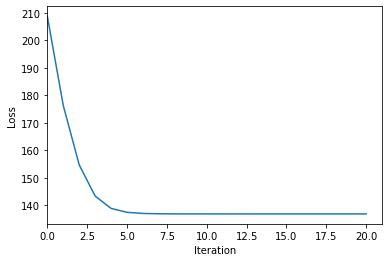

In [75]:
plt.figure("loss iteration")
plt.plot(plotloss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.xlim(0,len(plotloss))
plt.show()